# Modelo machine learning - Petrobras 

**Algoritmos:** Random florest, naive bayes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("Dados\PETR4.SA 2020.csv")
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-05,37.380001,37.430000,36.799999,37.000000,30.928682,21396400.0
1,2010-01-06,36.799999,37.500000,36.799999,37.500000,31.346632,18720600.0
2,2010-01-07,37.270000,37.450001,37.070000,37.150002,31.054062,10964600.0
3,2010-01-08,37.160000,37.389999,36.860001,36.950001,30.886881,14624200.0
4,2010-01-11,37.209999,37.340000,36.619999,36.830002,30.786566,15317700.0
...,...,...,...,...,...,...,...
2616,2020-07-21,23.150000,23.600000,23.139999,23.370001,23.369537,101769600.0
2617,2020-07-22,23.299999,23.410000,23.010000,23.049999,23.049541,43085500.0
2618,2020-07-23,23.160000,23.230000,22.540001,22.570000,22.570000,64072100.0
2619,2020-07-24,22.540001,23.059999,22.420000,22.730000,22.730000,43380300.0


In [3]:
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-05,37.380001,37.430000,36.799999,37.000000,30.928682,21396400.0
1,2010-01-06,36.799999,37.500000,36.799999,37.500000,31.346632,18720600.0
2,2010-01-07,37.270000,37.450001,37.070000,37.150002,31.054062,10964600.0
3,2010-01-08,37.160000,37.389999,36.860001,36.950001,30.886881,14624200.0
4,2010-01-11,37.209999,37.340000,36.619999,36.830002,30.786566,15317700.0


In [4]:
dados.shape

(2621, 7)

In [5]:
dados.columns = ["Data", "Aberta", "Alta", "Baixa", "Fechada", "Adj fechada", "Volume"]
dados

,Data,Aberta,Alta,Baixa,Fechada,Adj fechada,Volume
0,2010-01-05,37.380001,37.430000,36.799999,37.000000,30.928682,21396400.0
1,2010-01-06,36.799999,37.500000,36.799999,37.500000,31.346632,18720600.0
2,2010-01-07,37.270000,37.450001,37.070000,37.150002,31.054062,10964600.0
3,2010-01-08,37.160000,37.389999,36.860001,36.950001,30.886881,14624200.0
4,2010-01-11,37.209999,37.340000,36.619999,36.830002,30.786566,15317700.0
...,...,...,...,...,...,...,...
2616,2020-07-21,23.150000,23.600000,23.139999,23.370001,23.369537,101769600.0
2617,2020-07-22,23.299999,23.410000,23.010000,23.049999,23.049541,43085500.0
2618,2020-07-23,23.160000,23.230000,22.540001,22.570000,22.570000,64072100.0
2619,2020-07-24,22.540001,23.059999,22.420000,22.730000,22.730000,43380300.0


In [6]:
dados.isnull()

,Data,Aberta,Alta,Baixa,Fechada,Adj fechada,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2616,False,False,False,False,False,False,False
2617,False,False,False,False,False,False,False
2618,False,False,False,False,False,False,False
2619,False,False,False,False,False,False,False


In [7]:
dados.drop("Data", inplace = True, axis = 1)
dados

,Aberta,Alta,Baixa,Fechada,Adj fechada,Volume
0,37.380001,37.430000,36.799999,37.000000,30.928682,21396400.0
1,36.799999,37.500000,36.799999,37.500000,31.346632,18720600.0
2,37.270000,37.450001,37.070000,37.150002,31.054062,10964600.0
3,37.160000,37.389999,36.860001,36.950001,30.886881,14624200.0
4,37.209999,37.340000,36.619999,36.830002,30.786566,15317700.0
...,...,...,...,...,...,...
2616,23.150000,23.600000,23.139999,23.370001,23.369537,101769600.0
2617,23.299999,23.410000,23.010000,23.049999,23.049541,43085500.0
2618,23.160000,23.230000,22.540001,22.570000,22.570000,64072100.0
2619,22.540001,23.059999,22.420000,22.730000,22.730000,43380300.0


In [8]:
dados.drop(["Adj fechada"], axis = 1, inplace=True)
dados.dropna(inplace=True)
dados

,Aberta,Alta,Baixa,Fechada,Volume
0,37.380001,37.430000,36.799999,37.000000,21396400.0
1,36.799999,37.500000,36.799999,37.500000,18720600.0
2,37.270000,37.450001,37.070000,37.150002,10964600.0
3,37.160000,37.389999,36.860001,36.950001,14624200.0
4,37.209999,37.340000,36.619999,36.830002,15317700.0
...,...,...,...,...,...
2616,23.150000,23.600000,23.139999,23.370001,101769600.0
2617,23.299999,23.410000,23.010000,23.049999,43085500.0
2618,23.160000,23.230000,22.540001,22.570000,64072100.0
2619,22.540001,23.059999,22.420000,22.730000,43380300.0


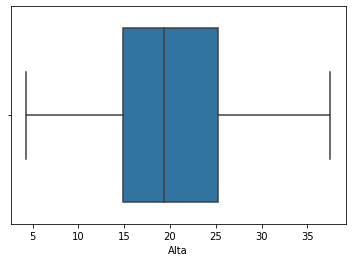

In [9]:
sns.boxplot(dados.Alta)

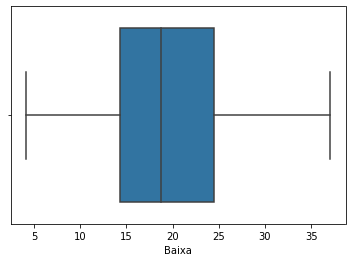

In [10]:
sns.boxplot(dados.Baixa)

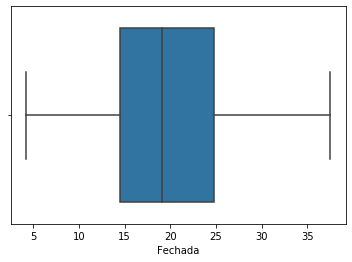

In [11]:
sns.boxplot(dados.Fechada)

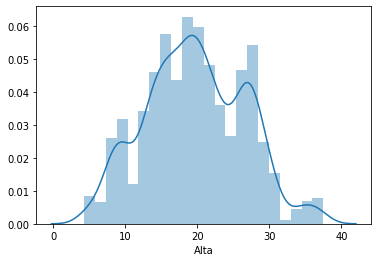

In [12]:
sns.distplot(dados.Alta)

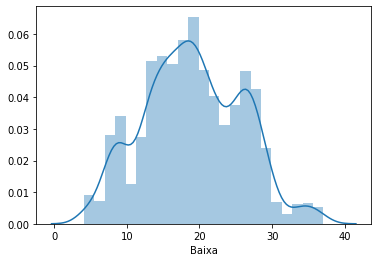

In [13]:
sns.distplot(dados.Baixa)

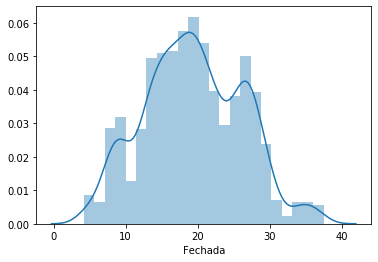

In [14]:
sns.distplot(dados.Fechada)

In [15]:
x1 = dados.iloc[:,0:4].values
x2 = dados.iloc[:,4].values

In [16]:
from sklearn.model_selection import train_test_split

x = dados[["Aberta", "Alta", "Baixa", "Fechada", "Volume"]]
y = dados["Volume"]

x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)

In [17]:
x_train

array([[25.25    , 25.42    , 23.459999, 23.790001],
       [28.16    , 28.389999, 28.110001, 28.25    ],
       [29.15    , 29.25    , 28.23    , 28.32    ],
       ...,
       [16.049999, 16.25    , 15.11    , 15.39    ],
       [ 9.31    ,  9.65    ,  9.27    ,  9.32    ],
       [27.5     , 27.92    , 27.4     , 27.809999]])

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(dados)
df

array([[ 2.64087837,  2.59503519,  2.61776548,  2.59319101, -0.696217  ],
       [ 2.55568476,  2.60526665,  2.61776548,  2.66673518, -0.77844971],
       [ 2.62472087,  2.59795861,  2.65769387,  2.61525455, -1.01680718],
       ...,
       [ 0.55217319,  0.51951105,  0.50896343,  0.47070623,  0.61529304],
       [ 0.46110462,  0.49466308,  0.49121739,  0.49424036, -0.02060757],
       [ 0.50957668,  0.52243432,  0.49565401,  0.56337203,  0.38380417]])

In [19]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
N1 = preprocessing.MinMaxScaler()
N2 = min_max_scaler.fit_transform(dados)
N2

array([[0.99849537, 0.99789347, 0.99180574, 0.98498498, 0.03061218],
       [0.9810412 , 1.        , 0.99180574, 1.        , 0.02678387],
       [0.99518507, 0.99849537, 1.        , 0.98948955, 0.01568723],
       ...,
       [0.57056876, 0.57056876, 0.55902886, 0.55165165, 0.09166899],
       [0.55191095, 0.56545287, 0.55538695, 0.55645646, 0.0620649 ],
       [0.56184174, 0.57117063, 0.55629745, 0.5705706 , 0.08089212]])

In [20]:
N1_R = min_max_scaler.inverse_transform(df)
N1_R

array([[ 9.19563881e+01,  9.05030193e+01,  9.03753727e+01,
         9.05532605e+01, -4.86621300e+08],
       [ 8.91254045e+01,  9.08430106e+01,  9.03753727e+01,
         9.30022814e+01, -5.44097904e+08],
       [ 9.14194744e+01,  9.06001646e+01,  9.16910129e+01,
         9.12879766e+01, -7.10698004e+08],
       ...,
       [ 2.25487150e+01,  2.15333522e+01,  2.08903449e+01,
         1.98745175e+01,  4.30059445e+08],
       [ 1.95225065e+01,  2.07076542e+01,  2.03056132e+01,
         2.06582041e+01, -1.44036717e+07],
       [ 2.11332329e+01,  2.16304926e+01,  2.04517997e+01,
         2.29602887e+01,  2.68260161e+08]])

**Naive bayes**

In [21]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
x1[:,0] = labelencoder.fit_transform(x1[:,0])
x1[:,1] = labelencoder.fit_transform(x1[:,1])
x1[:,2] = labelencoder.fit_transform(x1[:,2])
x1[:,3] = labelencoder.fit_transform(x1[:,3])
x1[:,0]

array([1497., 1488., 1496., ..., 1015.,  977., 1000.])

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
y_pred

array([30571700.,        0., 19025100.,        0.,        0.,        0.,
       19025100.,        0.,        0., 42703800.,        0.,        0.,
              0.,        0.,        0.,        0., 17017800., 37053900.,
              0.,        0., 30571700.,        0., 30571700.,        0.,
       19025100.,        0., 37053900., 30571700.,        0.,        0.,
       37053900.,        0.,        0.,        0., 42703800., 19025100.,
              0., 30571700., 37053900., 19025100.,        0., 30571700.,
       19025100.,        0.,        0.,        0., 19025100., 37053900.,
       42703800.,        0., 30571700.,        0.,        0.,        0.,
              0.,        0.,        0., 37053900.,        0.,        0.,
              0.,        0., 37053900.,        0., 17017800.,        0.,
       19025100.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0., 19025100.,        0.,
       17017800.,        0., 19025100., 19025100., 

**Random Forest**

**Avore - 1**

In [23]:
from sklearn.ensemble import RandomForestClassifier

avore1 = RandomForestClassifier(n_estimators = 100)
avore1.fit(x_train, y_train)
X1 = avore1.predict(x_test)
X1

array([4.547560e+07, 2.806290e+07, 1.689590e+07, 2.594130e+07,
       4.763060e+07, 3.992990e+07, 4.386370e+07, 2.552480e+07,
       1.757300e+07, 2.415040e+07, 2.434020e+07, 3.232680e+07,
       6.517310e+07, 8.822880e+07, 3.141940e+07, 3.835240e+07,
       1.701780e+07, 4.607630e+07, 2.629220e+07, 3.441380e+07,
       3.584580e+07, 6.402720e+07, 4.338030e+07, 7.002160e+07,
       1.738090e+07, 6.832840e+07, 6.411290e+07, 3.555700e+06,
       2.645140e+07, 8.504140e+07, 4.533050e+07, 1.149671e+08,
       2.886040e+07, 2.166970e+07, 3.707170e+07, 2.841890e+07,
       2.136550e+07, 3.707710e+07, 4.827700e+07, 3.440570e+07,
       6.741870e+07, 7.047520e+07, 2.399630e+07, 4.955950e+07,
       5.065050e+07, 8.034390e+07, 1.676900e+07, 2.649330e+07,
       8.351820e+07, 1.937050e+07, 2.059990e+07, 1.699450e+07,
       1.774910e+07, 7.052110e+07, 3.792150e+07, 3.081360e+07,
       2.508880e+07, 7.564400e+07, 4.559530e+07, 3.181000e+07,
       2.186930e+07, 1.149671e+08, 2.748980e+07, 5.7741

**Avore - 2**

In [24]:
avore2 = RandomForestClassifier(n_estimators = 40, criterion='entropy', random_state=0)
avore2.fit(x_train, y_train)
x2 = avore2.predict(x_test)
x2

array([5.310630e+07, 2.806290e+07, 1.689590e+07, 2.594130e+07,
       4.763060e+07, 3.992990e+07, 2.919400e+07, 2.552480e+07,
       1.757300e+07, 2.415040e+07, 2.434020e+07, 3.232680e+07,
       5.881840e+07, 8.822880e+07, 3.141940e+07, 5.631560e+07,
       1.701780e+07, 4.607630e+07, 5.524070e+07, 3.441380e+07,
       3.584580e+07, 8.034390e+07, 1.752440e+07, 7.002160e+07,
       1.738090e+07, 1.578180e+07, 7.523020e+07, 3.555700e+06,
       2.645140e+07, 8.504140e+07, 4.533050e+07, 5.040020e+07,
       2.886040e+07, 2.166970e+07, 3.707170e+07, 2.841890e+07,
       2.136550e+07, 3.707710e+07, 7.299640e+07, 3.490800e+07,
       5.425630e+07, 6.771310e+07, 1.193280e+07, 9.468810e+07,
       6.738280e+07, 2.849040e+07, 2.961940e+07, 1.801250e+07,
       8.351820e+07, 1.937050e+07, 4.635970e+07, 1.699450e+07,
       1.774910e+07, 5.375370e+07, 3.792150e+07, 3.081360e+07,
       5.190740e+07, 7.564400e+07, 4.559530e+07, 3.181000e+07,
       2.186930e+07, 1.003220e+08, 2.748980e+07, 6.6717